**DataLoader**  

In [2]:
# Test dataloader and image transformations
from dataset import create_loaders
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def quick_look_gen(real_aia1, fake_iris1, fake_aia1, real_iris2, fake_aia2, fake_iris2, savename=None):

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8, 5))
    ax1.set_title('AIA (REAL)', fontsize=8)
    ax1.imshow(real_aia1, aspect='auto', cmap='binary')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_title('IRIS (FAKE)', fontsize=8)
    ax2.imshow(fake_iris1, aspect='auto', cmap='binary')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.set_title('AIA (FAKE)', fontsize=8)
    ax3.imshow(fake_aia1, aspect='auto', cmap='binary')
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax4.set_title('IRIS (REAL)', fontsize=8)
    ax4.imshow(real_iris2, aspect='auto', cmap='binary')
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax5.set_title('AIA (FAKE)', fontsize=8)
    ax5.imshow(fake_aia2, aspect='auto', cmap='binary')
    ax5.set_xticks([])
    ax5.set_yticks([])
    ax6.set_title('IRIS (FAKE)', fontsize=8)
    ax6.imshow(fake_iris2, aspect='auto', cmap='binary')
    ax6.set_xticks([])
    ax6.set_yticks([])
    plt.tight_layout()
    if savename is not None:
        plt.savefig(f'../callbacks/pics/{savename}.png', bbox_inches='tight')
    plt.show()
    plt.close(fig)
    return None

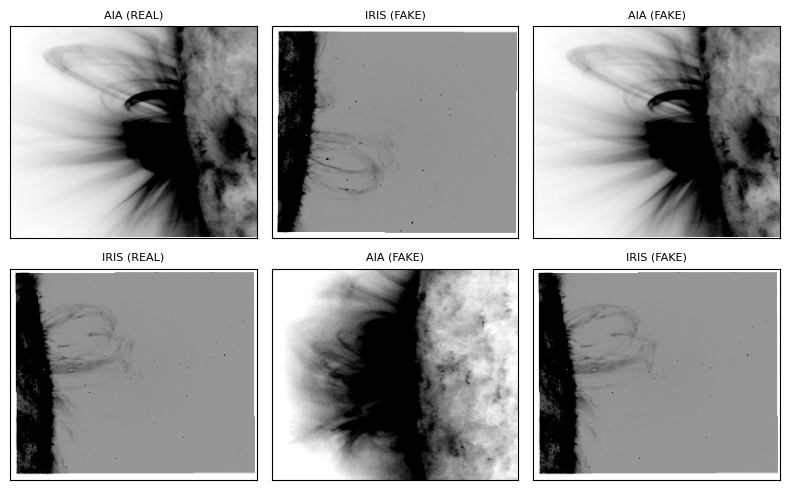

In [24]:
aia_test_data = np.load("../data/aia_test.npy", allow_pickle=True)
iris_test_data = np.load("../data/iris_test.npy", allow_pickle=True)

ind1 = 176
ind2 = 11
real_aia1, real_iris1 = np.squeeze(aia_test_data[ind1]), np.squeeze(iris_test_data[ind1])
real_aia2, real_iris2 = np.squeeze(aia_test_data[ind2]), np.squeeze(iris_test_data[ind2])

fake_iris1 = real_iris1
fake_aia1 = real_aia1
fake_iris2 = real_iris2
fake_aia2 = real_aia2

quick_look_gen(real_aia1, fake_iris1, fake_aia1, real_iris2, fake_aia2, fake_iris2, savename='test')

In [25]:
# aia_data = np.load("../data/aia_test.npy", allow_pickle=True)
# iris_data = np.load("../data/iris_test.npy", allow_pickle=True)
# for i in range(len(aia_data)):
#     print(i)
#     aia_im = np.squeeze(aia_data[i])
#     iris_im = np.squeeze(iris_data[i]) ** 2
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#     ax1.set_title('AIA 171')
#     ax1.imshow(aia_im, aspect='auto', cmap='binary')
#     ax2.set_title('IRIS 1400')
#     ax2.imshow(iris_im, aspect='auto', cmap='binary')
#     plt.show()
#     plt.close(fig)

In [22]:
# Load single aia iris image pair
train_loader, test_loader = create_loaders()
iris_ims, sdo_ims = next(iter(train_loader))
print(iris_ims.shape, sdo_ims.shape)

torch.Size([1, 1, 1, 256, 256]) torch.Size([1, 1, 1, 256, 256])


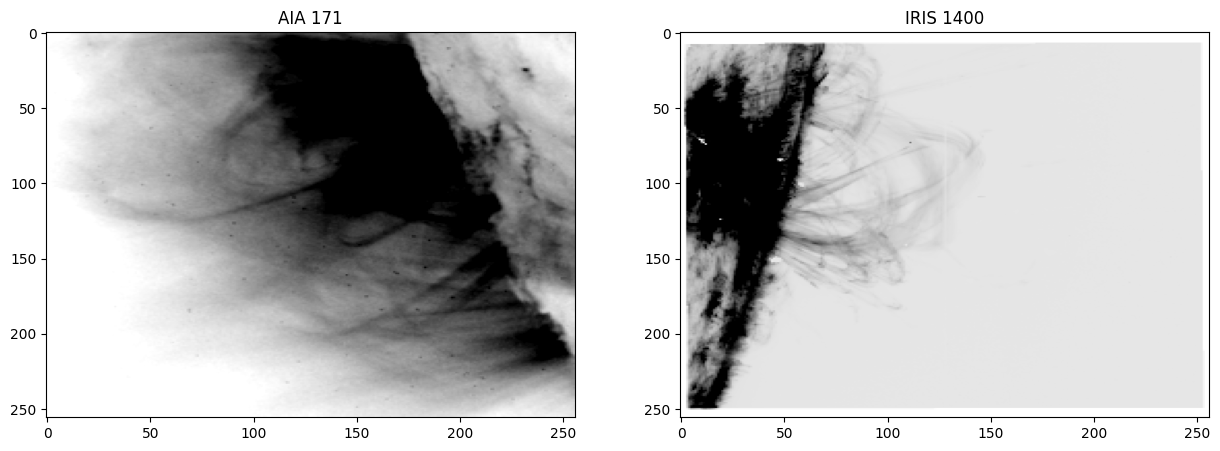

In [11]:
# plot image pair
aia_im = np.squeeze(sdo_ims[0, 0, :, :].numpy())
iris_im = np.squeeze(iris_ims[0, 0, :, :].numpy())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('AIA 171')
ax1.imshow(aia_im, aspect='auto', cmap='binary')
ax2.set_title('IRIS 1400')
ax2.imshow(iris_im, aspect='auto', cmap='binary')
plt.show()

**Generator**

In [6]:
import torch
from generator import Generator

# Create fake input
x = torch.randn(1, 1, 250, 250)
# Create generator
G = Generator(num_res_blocks=9)
# Pass fake input through generator
y = G(x)
print(y.shape)


torch.Size([1, 1, 252, 252])


**Discriminator**

In [7]:
import torch 
from discriminator import Discriminator

# Create fake input
x = torch.randn((1, 1, 250, 250))
# Create discriminator
D = Discriminator()
# Pass fake input through discriminator
y = D(x)
print(y.shape)

torch.Size([1, 1, 30, 30])


In [2]:
# # Test dataloader and image transformations
# from dataset import create_loaders
# import matplotlib.pyplot as plt
# import numpy as np

# # Randomly select 1000 training images for each dataset
# train_loader, test_loader = create_loaders(test_percent=0.3, batch_size=1000, sdo_channels=['171'], iris_channel='1400')
# # Get a batch of training data
# iris_batch, sdo_batch = next(iter(train_loader))
# print(iris_batch.shape, sdo_batch.shape)
# np.save('../sdata/iris_train.npy', iris_batch)
# np.save('../sdata/aia_train.npy', sdo_batch)
# # Get a batch of testing data
# train_loader, test_loader = create_loaders(test_percent=0.3, batch_size=200, sdo_channels=['171'], iris_channel='1400')
# iris_batch, sdo_batch = next(iter(test_loader))
# print(iris_batch.shape, sdo_batch.shape)
# np.save('../sdata/iris_test.npy', iris_batch)
# np.save('../sdata/aia_test.npy', sdo_batch)

torch.Size([1000, 1, 256, 256]) torch.Size([1000, 1, 256, 256])
torch.Size([200, 1, 256, 256]) torch.Size([200, 1, 256, 256])
